# Previsão de Churn

### Análise dos Dados (Limpeza e Transformação)

#### Bibliotecas utilizadas:

In [1]:
# Manipulação de Dados
import pandas as pd
import numpy as np

# Visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore Warning(Avisos)
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)

#### Carregando os dados

In [2]:
data = pd.read_csv('../Data/Telco-Customer-Churn.csv', sep=',')

# Amostra dos dados
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Colunas
- customerID - Identificação do cliente
- gender - Sexo do cliente
- SeniorCitizen - Indicador se é um(a) idosa(a)	
- Partner - Indicador se tem um parceiro(a)
- Dependents - Indicador se possui dependentes
- tenure - Quantos meses o cliente esta na empresa
- PhoneService - Indicador se possui serviço de telefonia
- MultipleLines - Indicador se possui múltiplas linhas telfônicas
- InternetService - Indicador se possui serviços de internet
- OnlineSecurity - Indicador se possui serviços de segurança online
- OnlineBackup - Indicador se possui serviços de backup online
- DeviceProtection - Indicador se possui serviços de equipamentos
- TechSupport - Indicador se possui serviços de suporte técnico
- StreamingTV - Indicador se posui serviços de streaming de TV
- StreamingMovies - Indicador se possui serviços de streaming de filmes
- Contract - Tipo de contrato
- PaperlessBilling - Indicador se a cobrança é via papel ou não
- PaymentMethod - Indicador do tipo de pagamento
- MonthlyCharges - Valor mensal dos serviços
- TotalCharges - Valor total dos serviços desde o inicio
- Churn - Indicador se saiu da empresa ou não

#### Cópia do DataFrame original

In [3]:

data_copy = data.copy()


#### Informações do DataSet

In [4]:
data_copy.shape

(7043, 21)

In [5]:
data_copy.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Transformações no DataSet

In [7]:
# Coluna Churn - Alterando para 0 | 1
data_copy['Churn'].value_counts()

coluna_churn = {'Yes':1, 'No':0}
data_copy['Churn'].replace(coluna_churn, inplace=True)

In [8]:
# Colocando a coluna 'customerID' como indice
data_copy.set_index('customerID', inplace=True)

In [9]:
# Verificando a coluna 'TotalCharges'
# Vamos criar um filtro para verificar se há como dado espaço(s) em branco
filter_vazio = data_copy[data_copy['TotalCharges'] == ' ']

print(len(filter_vazio))

11


> Como podemos verificar temos 11 dados como vazio na coluna 'TotalCharges'

- Temos que transformá-la em '*float*'

In [10]:
# Fazendo o replace do dado vazio
data_copy['TotalCharges'] = data_copy['TotalCharges'].replace("\s+", "", regex=True)

# Transformando para float e os dado que estava vazio vai ficar como 'Nan'
data_copy['TotalCharges'] = pd.to_numeric(data_copy['TotalCharges'], errors='coerce')

# Verificando como ficou o tipo da coluna
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

### Analisando os dados

In [11]:
data_copy.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2266.771362,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


> Podemos verificar que:

- Coluna 'tenure'(Quantos meses o cliente esta na empresa) - A média em que o cliente esta na empresa em 32.37 meses 

In [18]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, palette="Set2")

> Verificando a coluna 'tenure'

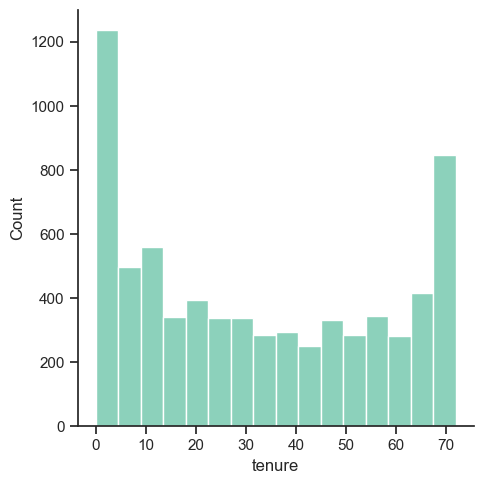

In [19]:
sns.displot(data=data_copy, x='tenure')
plt.show()

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(10, 16))
# linha 1
sns.countplot(x='gender', data=data_copy, ax=axes[0,0])
sns.countplot(x='gender', hue='Churn', data=data_copy, ax=axes[0,1])
axes[0,0].set_title('Qtd. de Clientes por Sexo')
axes[0,1].set_title('Qtd. de Clientes por Sexo x Churn')

# linha 2
sns.countplot(x='SeniorCitizen', data=data_copy, ax=axes[1,0])
sns.countplot(x='SeniorCitizen', hue='Churn', data=data_copy, ax=axes[1,1])
axes[1,0].set_title('Qtd. de Clientes Idosas')
axes[1,1].set_title('Qtd. de Clientes Idosas x Churn')

# linha 3
sns.countplot(x='Partner', data=data_copy, ax=axes[2,0])
sns.countplot(x='Partner', hue='Churn', data=data_copy, ax=axes[2,1])
axes[2,0].set_title('Qtd. de Clientes com Parceiro(a)')
axes[2,1].set_title('Qtd. de Clientes com Parceiro(a) x Churn')

# linha 4
sns.countplot(x='Dependents', data=data_copy, ax=axes[3,0])
sns.countplot(x='Dependents', hue='Churn', data=data_copy, ax=axes[3,1])
axes[3,0].set_title('Qtd. de Clientes com Depententes')
axes[3,1].set_title('Qtd. de Clientes com Depententes x Churn')

# Linha 5
sns.countplot(x='PhoneService', data=data_copy, ax=axes[4,0])
sns.countplot(x='PhoneService', hue='Churn', data=data_copy, ax=axes[4,1])
axes[4,0].set_title('Qtd. de Clientes com Serviço de Telefonia')
axes[4,1].set_title('Qtd. de Clientes com Serviço de Telefonia x Churn')

plt.subplots_adjust(left=0.2, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.5,  
                    hspace=0.8) 

plt.show()

In [ ]:
# Colocando a coluna 'customerID' como indice
data_copy.set_index('customerID', inplace=True)

In [ ]:
# Coluna Churn
data_copy['Churn'].value_counts()

coluna_churn = {'Yes':1, 'No':0}
data_copy['Churn'].replace(coluna_churn, inplace=True)

data_copy['Churn'].value_counts()

In [ ]:
columns = data_copy.columns
colunas_binarias = []

for col in columns:
    if data_copy[col].value_counts().shape[0] == 2:
        colunas_binarias.append(col)

colunas_binarias

In [ ]:
print(data_copy[['gender','Churn']].groupby(['gender']).mean())
print(data_copy[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean())
print(data_copy[['Partner','Churn']].groupby(['Partner']).mean())
print(data_copy[['Dependents','Churn']].groupby(['Dependents']).mean())
print(data_copy[['PhoneService','Churn']].groupby(['PhoneService']).mean())
print(data_copy[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean())